# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
BCSCrfs<-read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")
head(BCSCrfs)
nrow(BCSCrfs)

year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
2000,1,1,0,0,0,1,0,1,3,0,0,1
2000,1,1,0,0,1,3,0,1,2,0,0,1
2000,1,1,0,0,1,4,0,1,1,0,0,2
2000,1,1,0,0,2,3,0,1,1,0,0,1
2000,1,1,0,0,2,3,0,1,1,1,9,1
2000,1,1,0,0,4,9,0,1,1,0,0,1


[1] 1144564

In [2]:
BCSCrfs1 <- BCSCrfs[rep(row.names(BCSCrfs), BCSCrfs$count), ]
head(BCSCrfs1)
nrow(BCSCrfs1)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
1,2000,1,1,0,0,0,1,0,1,3,0,0,1
2,2000,1,1,0,0,1,3,0,1,2,0,0,1
3,2000,1,1,0,0,1,4,0,1,1,0,0,2
3.1,2000,1,1,0,0,1,4,0,1,1,0,0,2
4,2000,1,1,0,0,2,3,0,1,1,0,0,1
5,2000,1,1,0,0,2,3,0,1,1,1,9,1


[1] 6318638

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [3]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
BCSCrfs2<-BCSCrfs1[sample(1:nrow(BCSCrfs1), 5000 ), ]
nrow(BCSCrfs2)

[1] 5000

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [4]:
BCSCrfs2[,3:12][BCSCrfs2[,3:12] == 9]<-NA
#str(BCSCrfs2)

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [5]:
BCSCrfs2$ed_est<-0

ed_est1<-which(BCSCrfs2$age_group_5_years==1)
BCSCrfs2[ed_est1,]$ed_est<-mean(18:29)

ed_est2<-which(BCSCrfs2$age_group_5_years==2)
BCSCrfs2[ed_est2,]$ed_est<-mean(30:34)

ed_est3<-which(BCSCrfs2$age_group_5_years==3)
BCSCrfs2[ed_est3,]$ed_est<-mean(35:39)

ed_est4<-which(BCSCrfs2$age_group_5_years==4)
BCSCrfs2[ed_est4,]$ed_est<-mean(40:44)

ed_est5<-which(BCSCrfs2$age_group_5_years==5)
BCSCrfs2[ed_est5,]$ed_est<-mean(45:49)

ed_est6<-which(BCSCrfs2$age_group_5_years==6)
BCSCrfs2[ed_est6,]$ed_est<-mean(50:54)

ed_est7<-which(BCSCrfs2$age_group_5_years==7)
BCSCrfs2[ed_est7,]$ed_est<-mean(55:59)

ed_est8<-which(BCSCrfs2$age_group_5_years==8)
BCSCrfs2[ed_est8,]$ed_est<-mean(60:64)

ed_est9<-which(BCSCrfs2$age_group_5_years==9)
BCSCrfs2[ed_est9,]$ed_est<-mean(65:69)

ed_est10<-which(BCSCrfs2$age_group_5_years==10)
BCSCrfs2[ed_est10,]$ed_est<-mean(70:74)

ed_est11<-which(BCSCrfs2$age_group_5_years==11)
BCSCrfs2[ed_est11,]$ed_est<-mean(75:79)

ed_est12<-which(BCSCrfs2$age_group_5_years==12)
BCSCrfs2[ed_est12,]$ed_est<-mean(80:84)

ed_est13<-which(BCSCrfs2$age_group_5_years==13)
BCSCrfs2[ed_est13,]$ed_est<-mean(85:102)

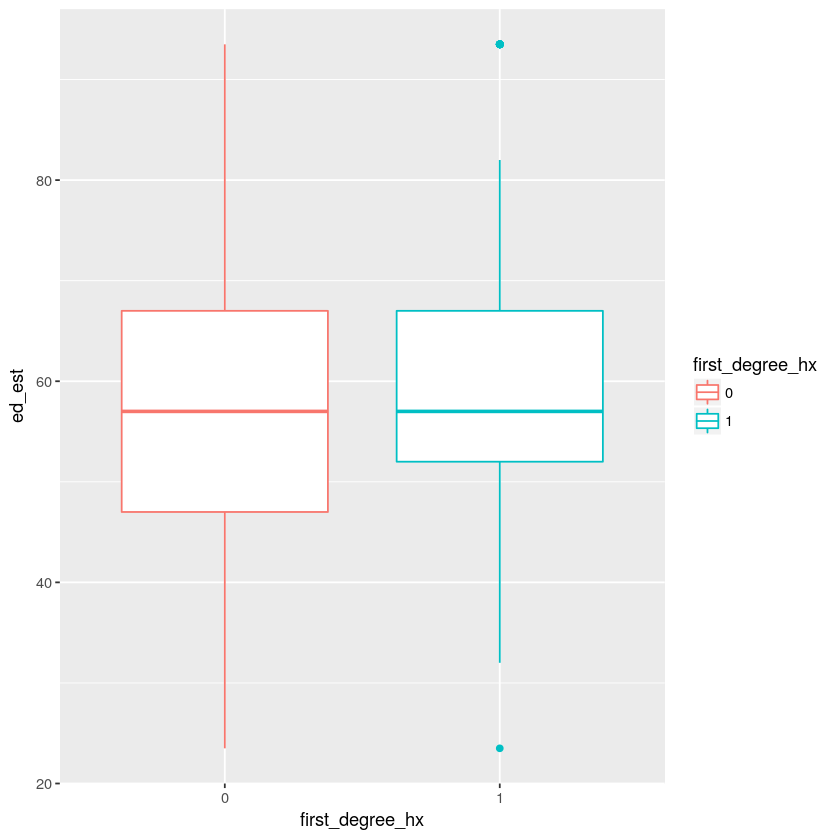

In [6]:
BCSCrfs3<-BCSCrfs2[,c('ed_est','first_degree_hx')]
BCSCrfs4<-BCSCrfs3[(complete.cases(BCSCrfs3[,'first_degree_hx'])),]
BCSCrfs4$first_degree_hx<-factor(BCSCrfs4$first_degree_hx)
library(ggplot2)
ggplot(data=BCSCrfs4,aes(x=first_degree_hx,y=ed_est,color=first_degree_hx))+geom_boxplot()

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

- El test de Shapiro comprueba si las distribuciones se asemejan a una gaussiana.

In [7]:
sprintf("Historial de cancer de un familiar de primer grado positivo (1)")
shapiro.test(BCSCrfs4[(BCSCrfs4$first_degree_hx == 1),]$ed_est)
sprintf("Historial de cancer de un familiar de primer grado negativo (0)")
shapiro.test(BCSCrfs4[(BCSCrfs4$first_degree_hx == 0),]$ed_est)

[1] "Historial de cancer de un familiar de primer grado positivo (1)"


	Shapiro-Wilk normality test

data:  BCSCrfs4[(BCSCrfs4$first_degree_hx == 1), ]$ed_est
W = 0.96545, p-value = 3.54e-12


[1] "Historial de cancer de un familiar de primer grado negativo (0)"


	Shapiro-Wilk normality test

data:  BCSCrfs4[(BCSCrfs4$first_degree_hx == 0), ]$ed_est
W = 0.95757, p-value < 2.2e-16


- p-valores muy bajos en ambos casos
- rechazamos la hipótesis nula
- conclusión: las medias de ambos conjuntos son diferentes
- se descarta utilizar una gaussiana
- utilizaremos el test de Wilcoxon-Mann-Whitney

In [8]:
wilcox.test(ed_est ~ first_degree_hx, data=BCSCrfs4)


	Wilcoxon rank sum test with continuity correction

data:  ed_est by first_degree_hx
W = 1239200, p-value = 2.339e-06
alternative hypothesis: true location shift is not equal to 0


- p-valor muy bajo
- rechazamos la hipótesis nula (las distribuciones son iguales)
- conclusión: la edad de aparición de cancer es dependiente de los antecedentes familiares

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

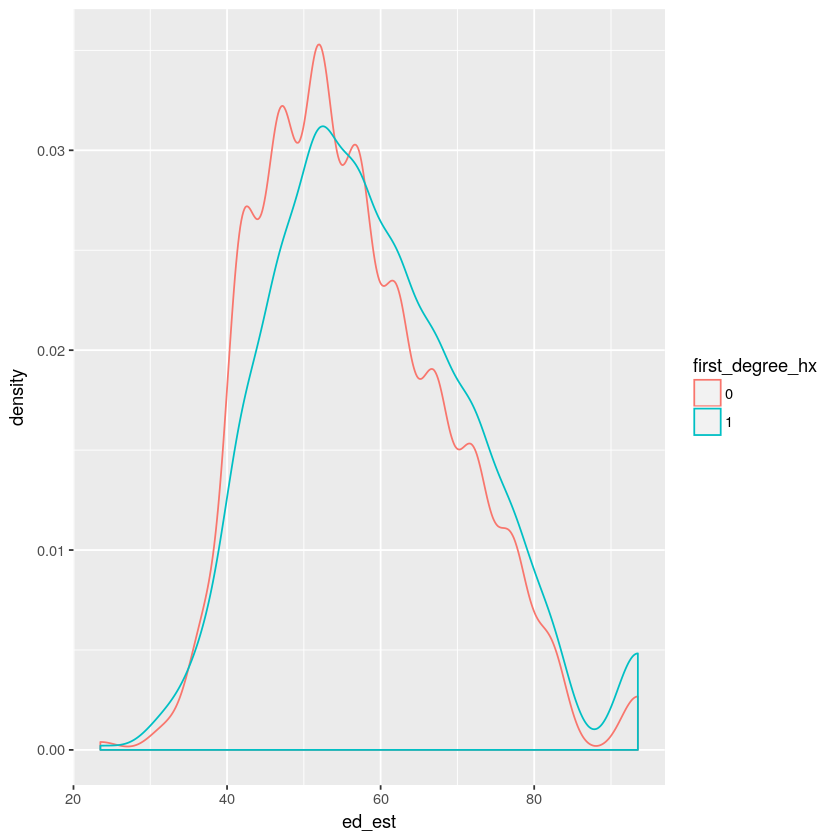

In [9]:
ggplot(data=BCSCrfs4,aes(x=ed_est,group=first_degree_hx,color=first_degree_hx))+
        geom_density()

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

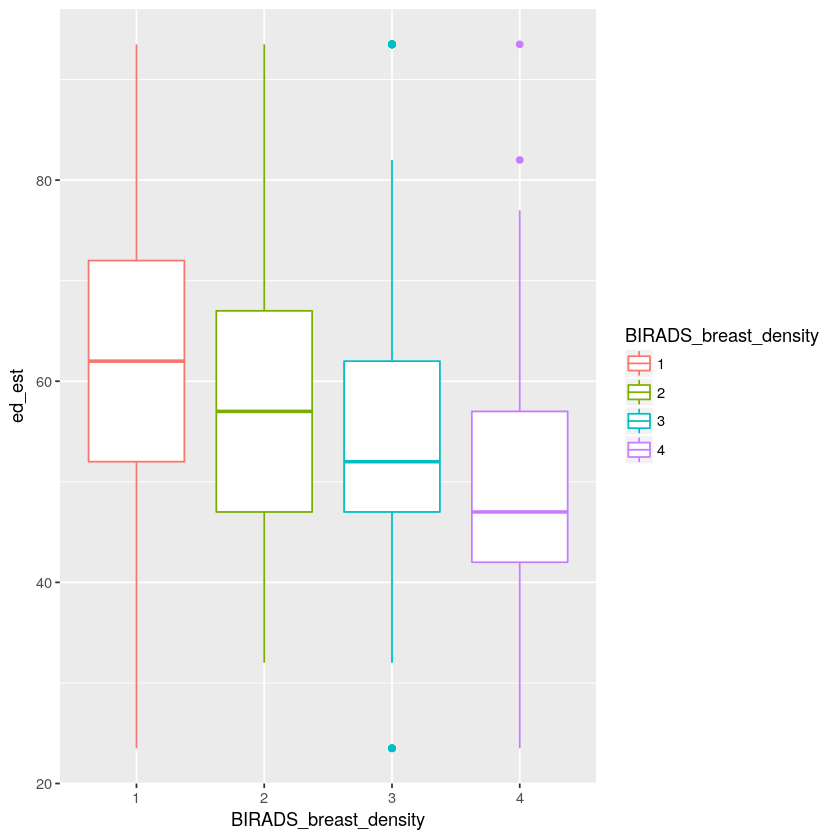

In [10]:
BCSCrfs2$BIRADS_breast_density<-as.factor(BCSCrfs2$BIRADS_breast_density)
BCSCrfs5<-BCSCrfs2[(complete.cases(BCSCrfs2[,'BIRADS_breast_density'])),]
ggplot(data=BCSCrfs5,aes(x=BIRADS_breast_density,y=ed_est,color=BIRADS_breast_density))+geom_boxplot()

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

Al igual que en el caso anterior utilizamos el test de shapiro para contrastar la normalidad del conjunto de datos

In [11]:
shapiro.test(BCSCrfs2[BCSCrfs2$BIRADS_breast_density==1,]$ed_est)
shapiro.test(BCSCrfs2[BCSCrfs2$BIRADS_breast_density==2,]$ed_est)
shapiro.test(BCSCrfs2[BCSCrfs2$BIRADS_breast_density==3,]$ed_est)
shapiro.test(BCSCrfs2[BCSCrfs2$BIRADS_breast_density==4,]$ed_est)


	Shapiro-Wilk normality test

data:  BCSCrfs2[BCSCrfs2$BIRADS_breast_density == 1, ]$ed_est
W = 0.97436, p-value = 3.7e-05



	Shapiro-Wilk normality test

data:  BCSCrfs2[BCSCrfs2$BIRADS_breast_density == 2, ]$ed_est
W = 0.96188, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  BCSCrfs2[BCSCrfs2$BIRADS_breast_density == 3, ]$ed_est
W = 0.94995, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  BCSCrfs2[BCSCrfs2$BIRADS_breast_density == 4, ]$ed_est
W = 0.93027, p-value = 1.27e-09


- p-valores muy bajos en todos los casos
- rechazamos la hipótesis nula
- conclusión: las medias de ambos conjuntos son diferentes
- se descarta utilizar una gaussiana
- utilizaremos el test de Kruskal-Wallis

In [12]:
kruskal.test( ed_est ~ BIRADS_breast_density, data=BCSCrfs2)


	Kruskal-Wallis rank sum test

data:  ed_est by BIRADS_breast_density
Kruskal-Wallis chi-squared = 156.19, df = 3, p-value < 2.2e-16


- el p-valor es realmente bajo
- rechazamos la hipótesis nula
- conclusión: la edad de aparición del cáncer varía en función de la densidad del cancer (BIRADS)

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [13]:
chisq.test(table(BCSCrfs2$BIRADS_breast_density))


	Chi-squared test for given probabilities

data:  table(BCSCrfs2$BIRADS_breast_density)
X-squared = 1816.3, df = 3, p-value < 2.2e-16


- Utilizamos una Chi-cuadrado
- p-valor muy bajo
- rechazamos la hipótesis nula
- Conclusión: NO todos los tipos de cancer tienen la misma probabilidad

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [14]:
which.max(table(BCSCrfs2$BIRADS_breast_density))

2 
2

In [15]:
prop.table(table(BCSCrfs2$BIRADS_breast_density))


         1          2          3          4 
0.08094849 0.45380213 0.39547561 0.06977378 

- El más común es el 2
- 45,38%

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [16]:
chisq.test(table(BCSCrfs2$first_degree_hx,BCSCrfs2$BIRADS_breast_density))


	Pearson's Chi-squared test

data:  table(BCSCrfs2$first_degree_hx, BCSCrfs2$BIRADS_breast_density)
X-squared = 4.2475, df = 3, p-value = 0.236


- p-value alto
- se acepta la hipótesis cero
- Conclusión: si hay una dependencia entre las variables

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [17]:
chisq.test(table(BCSCrfs2$race_eth,BCSCrfs2$BIRADS_breast_density),simulate.p.value = T)


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  table(BCSCrfs2$race_eth, BCSCrfs2$BIRADS_breast_density)
X-squared = 48.684, df = NA, p-value = 0.0004998


- p-value bajo
- no aceptamos la hipótesis nula
- Conclusión: no hay dependencia entre ambas variables

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [21]:
table(BCSCrfs2$race_eth,BCSCrfs2$BIRADS_breast_density)#[4,1]
sum(table(BCSCrfs2$race_eth,BCSCrfs2$BIRADS_breast_density))

   
       1    2    3    4
  1  204 1208 1021  179
  2   23  100   92   11
  3   11   51   85   29
  4    1    7    6    3
  5   26   98   94   11
  6    2   19   15    3

[1] 3299

In [18]:
binom.test(table(BCSCrfs2$race_eth,BCSCrfs2$BIRADS_breast_density)[4,1],sum(table(BCSCrfs2$race_eth,BCSCrfs2$BIRADS_breast_density)))


	Exact binomial test

data:  table(BCSCrfs2$race_eth, BCSCrfs2$BIRADS_breast_density)[4, 1] and sum(table(BCSCrfs2$race_eth, BCSCrfs2$BIRADS_breast_density))
number of successes = 1, number of trials = 3299, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 7.674359e-06 1.687719e-03
sample estimates:
probability of success 
          0.0003031222 


- race_eth: Native American = 4 
- BIRADS_breast_density: Almost entirely fat = 1
- binom.test: Lleva a cabo un contraste exacto (no aproximado) sobre el valor de la probabilidad de éxito en un experimento de Bernoulli
- 95 percent confidence interval: (7.674359e-06 - 1.687719e-03)
- probabilidad de que un Native American tenga un cancer de tipo Almost entirely fat = 0.0003031222